#### In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [19]:
# TensorFlow is an open-source deep learning framework developed by Google that allows developers to build and train machine learning models. It provides a comprehensive set of tools and libraries for implementing and deploying machine learning applications across a range of platforms, including desktops, servers, and mobile devices.

# At its core, TensorFlow uses dataflow graphs to represent the mathematical computations that make up a machine learning model. These graphs are made up of nodes, which represent mathematical operations, and edges, which represent the data that flows between them.

# One of the key features of TensorFlow is its ability to efficiently perform computations on large-scale datasets, making it well-suited for complex deep learning tasks, such as image and speech recognition, natural language processing, and robotics.

# TensorFlow also provides a range of high-level APIs, such as Keras, that make it easy to build and train models without having to worry about the low-level details of the underlying computations.

# Overall, TensorFlow is a powerful and flexible framework that has become a popular choice for researchers and developers working on machine learning projects.

In [20]:
# Keras is a high-level neural networks API, written in Python and capable of running on top of other popular deep learning frameworks such as TensorFlow, Theano, and CNTK. Keras was developed to make it easier for researchers and developers to build and experiment with deep learning models.

# Keras provides a simple and intuitive interface for building neural networks, allowing developers to focus on the design and architecture of their models rather than the low-level implementation details. It supports a wide range of neural network architectures, including convolutional networks, recurrent networks, and combinations of the two.

# Keras is known for its ease of use and flexibility. It provides a wide range of pre-built layers and models, as well as the ability to create custom layers and models. Keras also provides built-in support for common deep learning tasks such as classification, regression, and clustering.

# Keras has become a popular choice among deep learning researchers and practitioners due to its ease of use, flexibility, and support for a wide range of neural network architectures.

In [1]:
import tensorflow as tf 

from tensorflow import keras

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [13]:
#loading inbuilt handritten digit dataset from keras

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [12]:
#seeing how first element of dataset i.e. any handwritten digit  is stored in numerical format i.e. 2d array

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train[0].shape

(28, 28)

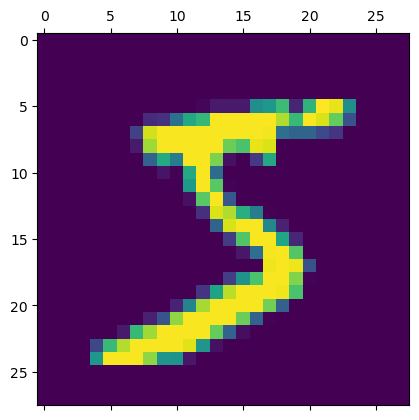

In [11]:
#plotting first training image

plt.matshow(x_train[0])

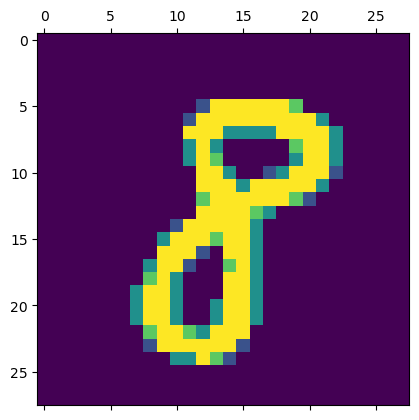

In [17]:
#plotting 245th images 

plt.matshow(x_train[245])

In [18]:
#checking 245th image

y_train[245]

8

#### Why flattening of images is important 

In deep learning, images are typically represented as two-dimensional arrays or matrices, with each pixel represented as a value between 0 and 255. A typical color image can have millions of pixels, resulting in a very high-dimensional input. Flattening the image into a one-dimensional vector reduces the input dimensionality and allows it to be used as input for models that require one-dimensional vectors as input.

For example, in a fully connected neural network, each neuron in a given layer is connected to every neuron in the previous layer. If the input to the network is a high-dimensional image, the number of connections between neurons in the first layer would be huge, resulting in a large number of weights to learn and a significant computational burden.

Flattening the image reduces the dimensionality of the input and reduces the number of weights that need to be learned, making the training process more efficient and reducing the risk of overfitting.

Overall, flattening is an important step when dealing with images in deep learning because it allows us to use a wider range of models and architectures, and can help to improve the efficiency and effectiveness of the training process.

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train_flattened=x_train.reshape(len(x_train),28*28)

x_test_flattened=x_test.reshape(len(x_test),28*28)

In [23]:
x_train_flattened.shape

(60000, 784)

In [24]:
x_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
# # now compare representation of x_train[0] element  which is in two dimensional array and 
# look at x_train_flattened whic is one dimensional array

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [28]:
#our neural network will be like following network 

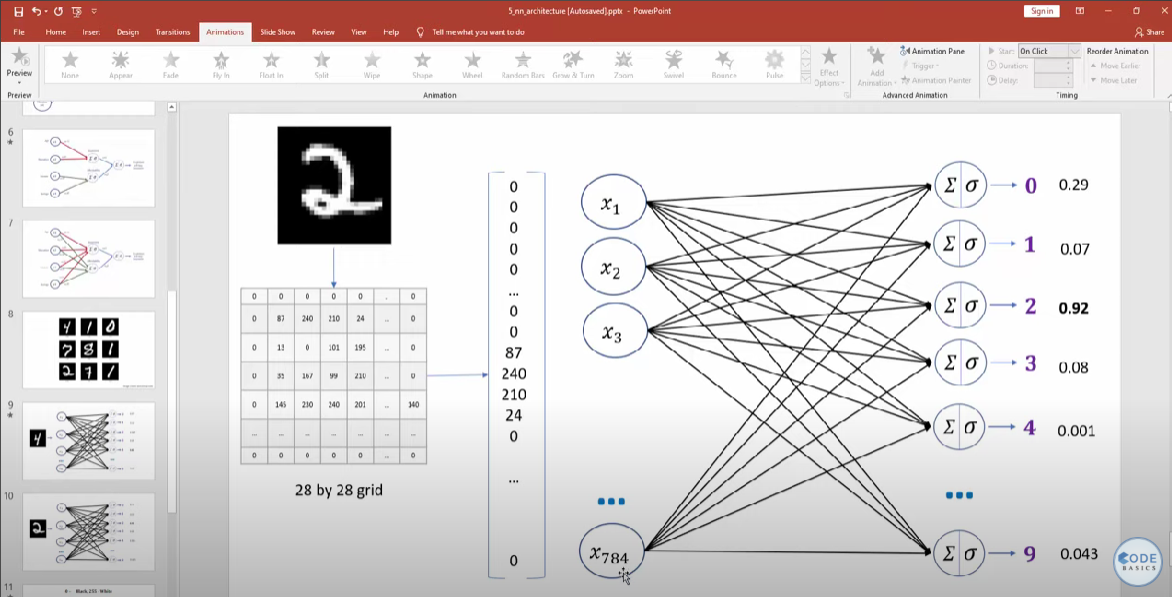

In [29]:
#  keras.layers.Dense is a class in the Keras API that defines a fully connected layer in a neural network.

# A fully connected layer, also known as a dense layer, is a type of layer in a neural network where each neuron in the layer is connected to every neuron in the previous layer. The Dense layer in Keras implements this behavior by multiplying the input by a weight matrix and adding a bias vector, then passing the result through an activation function.

# In the code you provided, the Dense layer is defined with 10 output neurons and an input shape of (784,). This means that the layer will take in a vector of length 784 as input, and output a vector of length 10. The activation function used in this layer is the sigmoid function, which is commonly used in neural networks for binary classification problems.

# The Sequential model in Keras is a linear stack of layers, where the output of each layer is passed as the input to the next layer. In this case, the Dense layer is the only layer in the model.





In [46]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 648us/step - loss: 9.5376 - accuracy: 0.8426
Epoch 2/5
1875/1875 [==============================] - 1s 667us/step - loss: 6.0539 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 1s 692us/step - loss: 5.6705 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 1s 691us/step - loss: 5.4762 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 1s 667us/step - loss: 5.3985 - accuracy: 0.8864


In [48]:
# The compile() method configures the model for training by setting the optimizer, loss function, and metrics. Here's a description of the arguments:

# optimizer: The optimizer algorithm to use during training. The 'adam' optimizer is a popular choice that performs well on a wide range of problems.
# loss: The loss function to use during training. In this case, we use 'sparse_categorical_crossentropy' which is commonly used for multi-class classification problems where the target variable is integer encoded.
# metrics: The metric(s) to use during training to evaluate the performance of the model. In this case, we use 'accuracy' to measure the proportion of correctly classified images.
# By calling the compile() method, the model is ready for training using the fit() method.

In [37]:
# to improve accuracy we will scale x_train and x_test by deviding each elements matrix by 255

In [51]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [52]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [64]:
# #scaling values in 2d array of x_train and y_train

# x_train2=x_train/255 and x_test2=x_test/255 represents a scaling technique called normalization, which is commonly used in deep learning models.

# In this case, each pixel value in the input image is divided by 255, which is the maximum pixel value in the image. This scales the pixel values to a range between 0 and 1, making it easier for the model to learn from the input data.

# Normalization is important because it ensures that all input features (pixel values) are on a similar scale, which can prevent the model from assigning too much importance to certain features based solely on their scale.

In [39]:
x_train2=x_train/255

x_test2=x_test/255

In [49]:
x_train2[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
x_test2[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [59]:
x_train_flattened_scaled=x_train2.reshape(len(x_train2),28*28)

x_test_flattened_scaled=x_test2.reshape(len(x_test2),28*28)

In [60]:
x_train_flattened_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
model_2 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(x_train_flattened_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 634us/step - loss: 0.4671 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 631us/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 633us/step - loss: 0.2662 - accuracy: 0.9257


In [63]:
#accuracy is improved by scaling technique

In [65]:
# evaluating model

model_2.evaluate(x_test_flattened_scaled,y_test)

313/313 [==============================] - 0s 572us/step - loss: 0.2691 - accuracy: 0.9255


[0.2691297233104706, 0.9254999756813049]

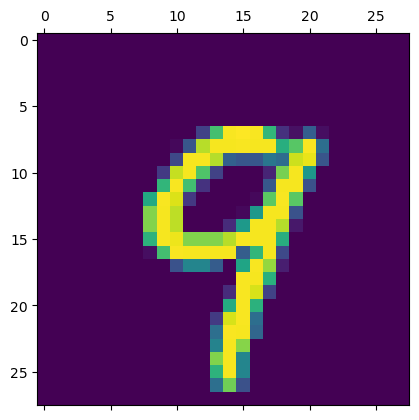

In [67]:
plt.matshow(x_test[12])

In [68]:
#testing model 

y_pred=model_2.predict(x_test_flattened_scaled)



313/313 [==============================] - 0s 497us/step


In [69]:
y_pred[12]

array([6.4710400e-04, 5.9377749e-06, 1.3449956e-03, 7.6850444e-02,
       5.9220231e-01, 2.9947612e-02, 7.1759301e-04, 7.8655893e-01,
       2.0270182e-01, 9.8600906e-01], dtype=float32)

In [70]:
np.argmax(y_pred[12])

9

In [71]:
#model predicted accurately the handwritten digit is 9

In [72]:
#converitng our output from index of elemnt into concrete class array format to pass to confusion matrix

y_pred_labels=[np.argmax(i) for i in y_pred ]

In [74]:
y_pred_labels[:12]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6]

In [77]:
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [76]:
#evaluating by confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)


In [78]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    1,    0,    5,    8,    4,    4,    1],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    9,  915,   17,    9,    5,   13,   13,   45,    3],
       [   4,    0,   15,  918,    0,   26,    2,   13,   27,    5],
       [   1,    1,    2,    2,  910,    0,   14,    4,   10,   38],
       [   8,    2,    2,   29,   11,  769,   18,   10,   37,    6],
       [   7,    3,    6,    1,    8,    8,  922,    2,    1,    0],
       [   1,    5,   20,    8,    7,    0,    0,  962,    3,   22],
       [   4,    6,    5,   19,    9,   18,   10,   13,  887,    3],
       [   8,    7,    2,   10,   27,    5,    0,   31,   11,  908]])>

<IPython.core.display.Javascript object>

<AxesSubplot:>

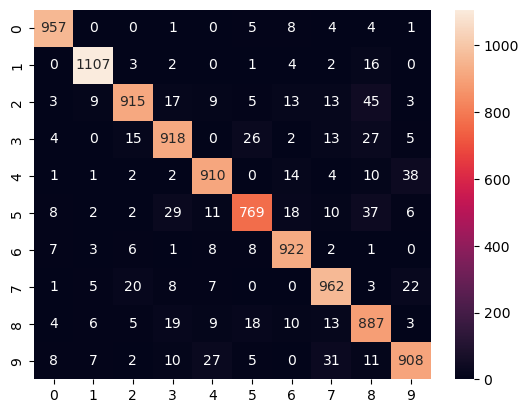

In [81]:
sns.heatmap(cm,annot=True, fmt='d')

In [82]:
## adding hidden layer and lets see what happens 


model_2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(x_train_flattened_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.2740 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.1252 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.0873 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.0660 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.0531 - accuracy: 0.9840


In [83]:
# accuracy is improved by adding one hidden layer

In [84]:
# evaluating model

model_2.evaluate(x_test_flattened_scaled,y_test)

313/313 [==============================] - 0s 660us/step - loss: 0.0833 - accuracy: 0.9736


[0.08334942907094955, 0.9735999703407288]

In [86]:
#testing model 

y_pred2=model_2.predict(x_test_flattened_scaled)


313/313 [==============================] - 0s 621us/step


In [87]:
#converitng our output from index of elemnt into concrete class array format to pass to confusion matrix

y_pred_labels2=[np.argmax(i) for i in y_pred2 ]

In [88]:
#evaluating by confusion matrix

cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels2)


<IPython.core.display.Javascript object>

Text(50.722222222222214, 0.5, 'Truth')

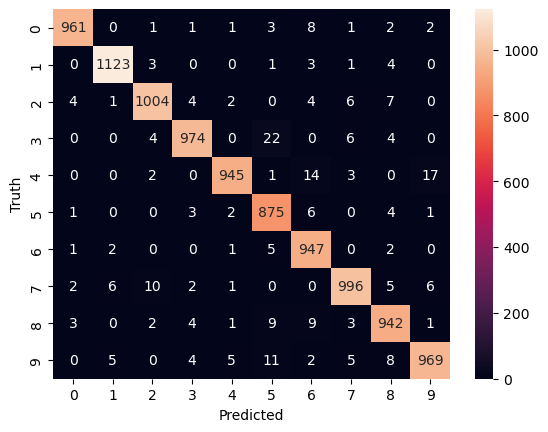

In [89]:
#evaluating previuos model with this one with help ofconfusion matrix

sns.heatmap(cm2,annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
## keras provide flatten layer to flatten input and we jus t dont need to manually flatten our input

In [92]:
#Using Flatten layer so that we don't have to call .reshape on input dataset

model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2683 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4065 - accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3000 - accuracy: 0.9225
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9348
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2327 - accuracy: 0.9407
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2072 - accuracy: 0.9476
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2046 - accuracy: 0.9493
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1905 - accuracy: 0.9521
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.185